In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df_hotel = pd.read_csv('hotel_bookings.csv')

In [ ]:
print(f'Dữ liệu gồm: {(df_hotel.shape[0]):,} dòng và {df_hotel.shape[1]} cột')
df_hotel.head()

## 1. Kiểm tra dữ liệu null

In [ ]:
df_hotel.isnull().sum()

## 1.1 Cột country
Dữ liệu bị missing ở cột country chỉ chiếm 0,4% dữ liệu nên nhóm quyết định xóa các giá trị null

In [5]:
df_hotel.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [6]:
df_hotel = df_hotel[df_hotel['country'].notnull()]
print(f'Dữ liệu gồm: {(df_hotel.shape[0]):,} dòng và {df_hotel.shape[1]} cột')
df_hotel.head()

Dữ liệu gồm: 118,902 dòng và 32 cột


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 1.2 Cột agent
Dữ liệu bị missing ở cột agent là ID của những đại lí đặt phòng nên nhóm quyết định những giá trị null sẽ thay thế bằng None (ẩn danh)

In [7]:
df_hotel['agent'] = df_hotel['agent'].fillna('None')

## 1.3 Cột Company
Dữ liệu bị missing ở cột Company là ID của những công ty đặt phòng nên nhóm quyết định những giá trị null sẽ thay thế bằng None (ẩn danh)

In [8]:
df_hotel['company'] = df_hotel['company'].fillna('None')

## 1.4 Cột chilren
Dữ liệu bị missing ở cột Company là ID của những công ty đặt phòng nên nhóm quyết định những giá trị null sẽ thay thế bằng None (ẩn danh)

In [9]:
df_hotel['children'] = df_hotel['children'].fillna(0)

## 2.Kiểm tra dữ liệu không nhất quán


In [10]:
colunms = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']

In [ ]:
for col in colunms:
  print(f"Cột {col} :")
  display(df_hotel[col].value_counts())
  print("############################################")


# 3.Kiểm tra dữ liệu trùng

In [12]:
df_hotel[df_hotel.duplicated() == True].shape

(31958, 32)

In [13]:
df_hotel.drop_duplicates(keep='first',inplace=True)

In [14]:
print(f'Dữ liệu gồm: {(df_hotel.shape[0]):,} dòng và {df_hotel.shape[1]} cột')
df_hotel.head()

Dữ liệu gồm: 86,944 dòng và 32 cột


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,None,None,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,None,None,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,None,None,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,None,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,None,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
clustering_columns = [
  'hotel', 'is_canceled','arrival_date_month','arrival_date_day_of_month','adults', 'children', 'babies', 'meal','country', 'market_segment', 'distribution_channel','assigned_room_type',
  'deposit_type', 'days_in_waiting_list', 'customer_type','required_car_parking_spaces', 'total_of_special_requests','is_repeated_guest'
]

In [17]:
df_hotel_clustering = df_hotel[clustering_columns]

In [18]:
df_hotel_clustering['is_canceled'] = df_hotel_clustering['is_canceled'].apply(lambda x: 'Yes' if x == 1 else 'No')
df_hotel_clustering['is_repeated_guest'] = df_hotel_clustering['is_repeated_guest'].apply(lambda x: 'Yes' if x == 1 else 'No')

C:\Users\minhd\AppData\Local\Temp\ipykernel_4272\4157562598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotel_clustering['is_canceled'] = df_hotel_clustering['is_canceled'].apply(lambda x: 'Yes' if x == 1 else 'No')
C:\Users\minhd\AppData\Local\Temp\ipykernel_4272\4157562598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotel_clustering['is_repeated_guest'] = df_hotel_clustering['is_repeated_guest'].apply(lambda x: 'Yes' if x == 1 else 'No')


In [19]:
df_hotel_clustering['key'] = df_hotel_clustering.index.astype(str)
df_hotel_clustering.to_excel('hotel_clustering.xlsx', index=False)

C:\Users\minhd\AppData\Local\Temp\ipykernel_4272\2441178965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotel_clustering['key'] = df_hotel_clustering.index.astype(str)


# Logistic Regression

In [ ]:
df_hotel

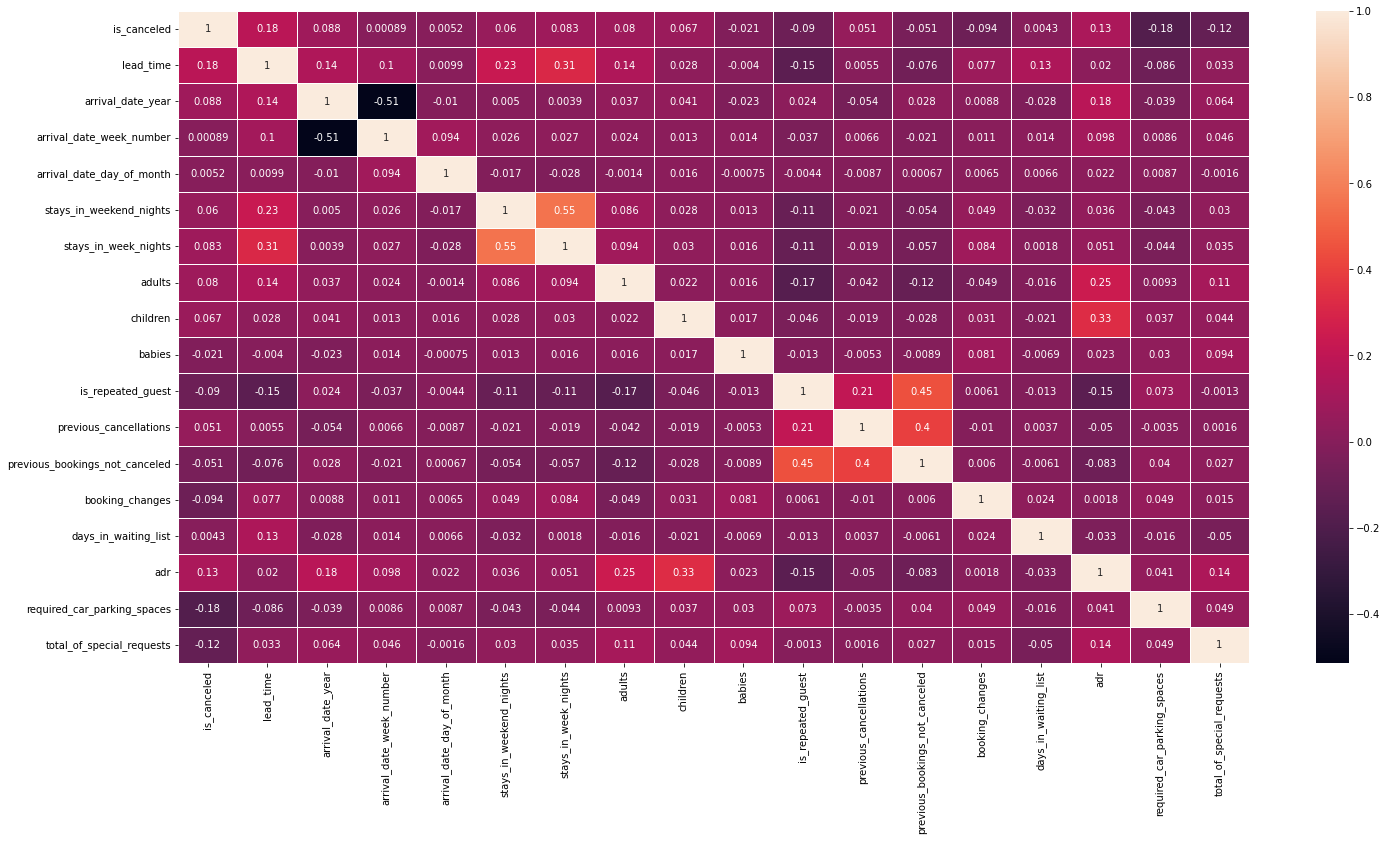

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (24, 12))

corr = df_hotel.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
correlation = df_hotel.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
required_car_parking_spaces       0.183715
lead_time                         0.183649
adr                               0.126556
total_of_special_requests         0.121735
booking_changes                   0.094072
is_repeated_guest                 0.090154
arrival_date_year                 0.087522
stays_in_week_nights              0.082798
adults                            0.080333
children                          0.067000
stays_in_weekend_nights           0.059576
previous_cancellations            0.050956
previous_bookings_not_canceled    0.050558
babies                            0.020599
arrival_date_day_of_month         0.005202
days_in_waiting_list              0.004297
arrival_date_week_number          0.000894
Name: is_canceled, dtype: float64

In [ ]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list','agent','company']

df_hotel_lr = df_hotel.drop(useless_col, axis = 1)

In [ ]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df_hotel_lr.columns if df_hotel_lr[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
cat_df = df_hotel_lr[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [ ]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
cat_df.head()

C:\Users\minhd\AppData\Local\Temp\ipykernel_18368\3792193783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)


,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B' 'P']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 16 29 19 18  9 13  4 12 26 17 15 10 20 14
 30 28 25 21 27 24 31]



In [ ]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8,'P':9})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [ ]:
num_df = df_hotel_lr.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,104.40,0,0


In [ ]:
num_df.var()

lead_time                         7413.168802
arrival_date_week_number           186.438276
arrival_date_day_of_month           78.048931
stays_in_weekend_nights              1.058340
stays_in_week_nights                 4.176889
adults                               0.391698
children                             0.208645
babies                               0.012903
is_repeated_guest                    0.037693
previous_cancellations               0.136579
previous_bookings_not_canceled       2.950995
adr                               3020.487556
required_car_parking_spaces          0.078622
total_of_special_requests            0.691949
dtype: float64

In [ ]:
import numpy as np

In [ ]:
# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
# num_df['agent'] = np.log(num_df['agent'] + 1)
# num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

c:\Users\minhd\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df_hotel_lr['is_canceled']

In [ ]:
X.shape, y.shape

((86944, 24), (86944,))

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
y_train.head(), y_test.head()

(22770    0
 69594    1
 97920    0
 49598    1
 2232     0
 Name: is_canceled, dtype: int64,
 6641      0
 109128    0
 86062     0
 41674     0
 107748    0
 Name: is_canceled, dtype: int64)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7953534733936513
Confusion Matrix : 
[[17983   815]
 [ 4523  2763]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     18798
           1       0.77      0.38      0.51      7286

    accuracy                           0.80     26084
   macro avg       0.79      0.67      0.69     26084
weighted avg       0.79      0.80      0.77     26084



c:\Users\minhd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")